In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import pickle
import random

import warnings
warnings.filterwarnings('ignore')

In [47]:
# import dataset
dataset = pd.read_csv('train.csv')
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data = dataset.iloc[:,1:]
labels = dataset.iloc[:, 0]

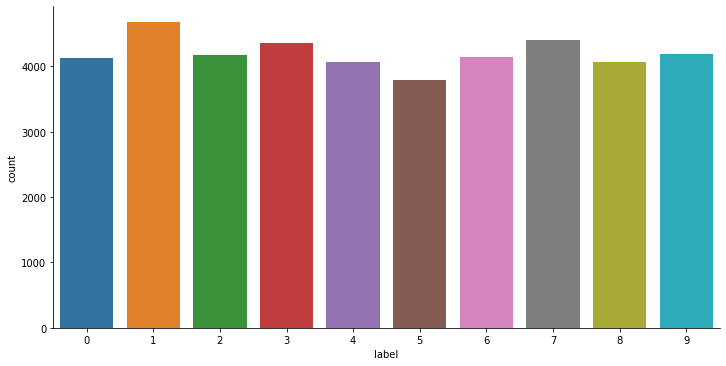

In [49]:
sns.catplot(data=dataset, x='label', kind='count', aspect=2)

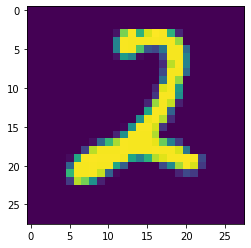

In [50]:
import random
img = data.iloc[random.randint(0, len(data))].values
img = img.reshape(28,28)
plt.imshow(img)

# Model Selection

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

In [25]:
scale = StandardScaler().fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [9]:
def evaluate(model):
    print("training set score: %f" %model.score(x_train_scaled, y_train))
    print("test set score: %f" %model.score(x_test_scaled, y_test))

def cross_validation(model):
    score = cross_val_score(model, x_train_scaled, y_train, cv=5)
    print("cross validation score: ", score)
    print("mean validation score %f" %score.mean())

In [8]:
classifiers = {'LogisticRegression':LogisticRegression(),
               'KNN': KNeighborsClassifier(), 
               'DecisionTreeClassifier': DecisionTreeClassifier(),
               'RandomForest':RandomForestClassifier(random_state=0), 
               'XGBClassifier': XGBClassifier(eval_metric='mlogloss')}

for model in classifiers:
    clf = classifiers[model]
    print('\n*', model)
    cross_validation(clf)


* LogisticRegression
cross validation score:  [0.91502976 0.91354167 0.9139881  0.90669643 0.90952381]
test set score 0.911756

* DecisionTreeClassifier
cross validation score:  [0.85520833 0.8546131  0.84315476 0.8453869  0.85119048]
test set score 0.849911

* XGBClassifier
[23:29:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
cross_validation(clf)

cross validation score:  [0.96547619 0.95907738 0.9610119  0.959375   0.96294643]
test set score 0.961577


## Train Model

In [56]:
model = XGBClassifier().fit(data.values, labels)

[12:57:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Save Model

In [12]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

## Load Model

In [13]:
# load saved model
with open('model_pkl', 'rb') as f:
    model = pickle.load(f)

## Make Submission

In [85]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
r = model.predict(test)
submission = pd.DataFrame({'ImageId':[i for i in range(1, len(test)+1)],
                          'Label': r})
submission.to_csv('submission.csv', index=False)

# Model Deployment

In [89]:
test = pd.read_csv('test.csv').values
with open('model_pkl', 'rb') as f:
    model = pickle.load(f)

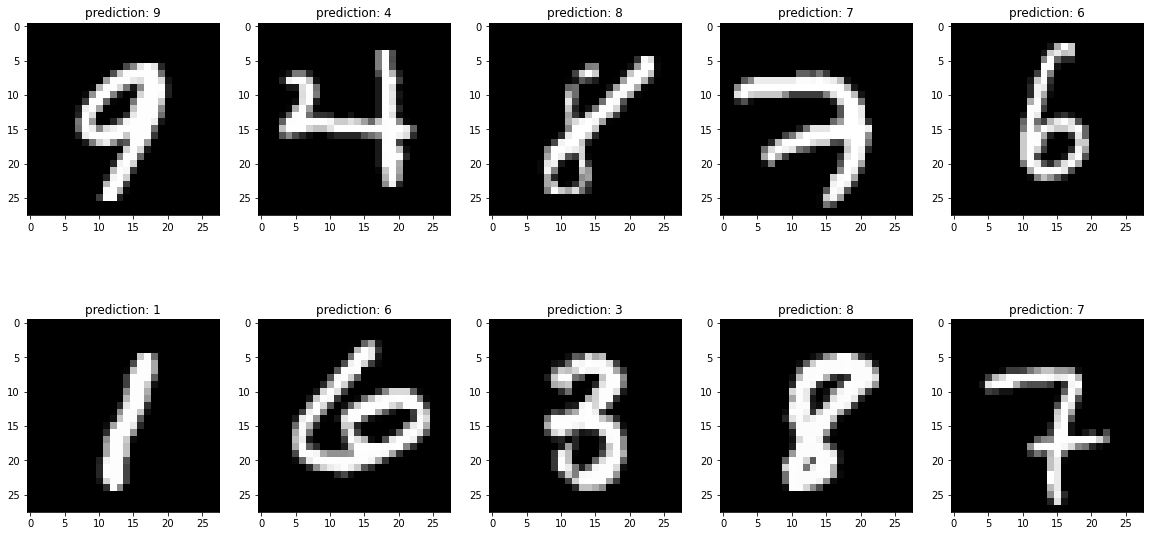

In [91]:
sample = random.sample(range(0, len(test)), 10)
predictions = model.predict(test[sample])

fig = plt.figure(figsize=(20, 10))
i = 1
for s in sample:
    img = test[s]
    img = img.reshape(28,28)
    fig.add_subplot(2,5,i)
    plt.imshow(img, cmap='gray')
    plt.title('prediction: '+str(predictions[i-1]))
    i+=1